In [105]:
from skimage import io
from skimage import transform
import numpy as np
import random
import math

# Funcion which creates array of puzzle pieces
# From a given picture

def from_image_to_pieces(image_path, n_rows, n_cols):
  
  image = io.imread(image_path)

  size = image.shape
  size = min(size[0], size[1])
  
  image = image[0:size, 0:size]

  step = math.floor(size / n_rows)
  
  pieces = []
  index = 0

  for i in range(n_rows):
    for j in range(n_cols):
      pieces.append((np.array(image[i*step: (i+1)*step, j*step : (j+1)*step]), index))
      index += 1

  return pieces, step

#pieces, step = from_image_to_pieces("lion.jpg", 10, 10)

In [106]:
def shuffle(pieces):
  random.shuffle(pieces)

  result = []
  rotations = []

  for x in pieces:
    image = x[0]
    index = x[1]

    i = random.randint(0, 4)
    rotations.append(i)
    x = transform.rotate(image, i*90)
    result.append((x, index))

  return result, rotations

#pieces = shuffle(pieces)

In [107]:
def make_image(pieces, step, n_rows, n_cols):

  image = np.array([])
  image = np.resize(image, (n_rows*step, n_cols*step, 3))

  for i in range(n_rows):
    for j in range(n_cols):
      image[i*step : (i+1)*step, j*step : (j+1)*step] = (pieces[i*n_cols + j])[0]
    
  io.imshow(image)
  #io.imsave("slika.jpg", image)

  #return image
  
#make_image(pieces, 36, 10, 10)

In [108]:
class Chromosome:

  def __init__(self, genetic_code, fittness, rotations):
    self.fittness = fittness
    self.genetic_code = genetic_code
    self.rotations = rotations

  def __str__(self):
        return "{} = {}".format(''.join(self.genetic_code), self.fitness)


Streaming output truncated to the last 5000 lines.
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72
(72, 3)
72


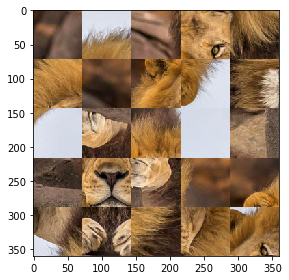

In [127]:
class GeneticAlgorithm:

  def __init__(self, image_path, n_rows):

    self.path = image_path
    self.n_rows = n_rows
    self.population_size = 100
    self.max_iteration = 300
    self.tournament_size = 10
    self.mutation_rate = 0.1
    self.selection_type = 'tournament'
    self.selection_size = 100
    self.elite_size = 10

  def get_diff(self, ind, piece, population):

    i = int(ind / 5)
    j = ind % 5

    # piece je size x size matrica piksela
    
    #print(f"i: {i}, j: {j}")

    if i == 4 and j == 4:
      return 0

    #if i == 4:
      #return
    #if j == 4:

    return 0
 
  def calculate_fittness(self, genetic_code, index, population):

    fittness = 0
    # genetic_code je par gde je prva komponenta deo slike,
    # a druga je pozicija tog dela u originalnoj slici

    # population je niz parova genetic_code-a

    # genetic_code[0] je duzine 72
    # genetic_code[1] je int
    # genetic_code je duzine 2

    i = 0
    for (piece, ind) in genetic_code:
      
      fittness += self.get_diff(i, piece, population)**2
      i += 1

    #print("===========================================================")

    return fittness
            
    
  def init_population(self):

    population = []
    rotations = []
    init_puzzle, step = from_image_to_pieces(self.path, self.n_rows, self.n_rows)

    for i in range(self.population_size):
      result, rot = shuffle(init_puzzle)
      population.append(result)
      rotations.append(rot)

    new_pop = []

    for i in range(len(population)):
      x = population[i]
      rot = rotations[i]
      image = x[0]
      ind = x[1]
      fittness = self.calculate_fittness(x, i, population)
      new_pop.append(Chromosome(x, fittness, rot))

    return new_pop, step


  def selection(self, population, elite = False):

    population = sorted(population, key=lambda x: x.fittness)

    selection = []
    if elite == True:
      if self.elite_size > self.selection_size:
        selection = population[0:selection_size]
        return selection
      else:
        selection = population[0:elite_size]

    for i in range(self.selection_size - self.elite_size):
      tourn = random.sample(population, self.tournament_size)
      selection.append(max(tourn, key=lambda x: x.fittness))

    return selection

  def is_end(self, pieces):

    pieces = pieces.genetic_code

    for i in range(len(pieces)):
      if (pieces[i])[1] != (i):
        return False

    return True

  def cross(self, selection):
    return selection

  def mutation(self, selection):
    return selection

  def Optimize(self):

    population, step = self.init_population()

    global_best = Chromosome(None, math.inf, None)


    for i in range(self.max_iteration):
      selected = self.selection(population)
      population = self.cross(selected)
      population = self.mutation(selected)

      best = max(population, key=lambda x: x.fittness)

      if best.fittness < global_best.fittness:
        global_best = best

      if (self.is_end(best)):
        break

    return global_best, step

GA = GeneticAlgorithm("lion.jpg", 5)

best, step = GA.Optimize()

make_image(best.genetic_code, step, 5, 5)

